In [1]:
# Import Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Training_MD.csv')

data.head()

,skin_rash,chills,joint_pain,vomiting,fatigue,high_fever,sweating,headache,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,diarrhoea,malaise,muscle_pain,red_spots_over_body,prognosis
0,1,1,1,1,1,1,0,1,1,1,1,1,0,0,1,1,1
1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,0,1,1
2,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,0,1
3,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1
4,0,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1


## Pre process

In [3]:
len(data['prognosis'].unique())
data['prognosis'].unique()

array([1, 0], dtype=int64)

In [4]:
len(data) #check how many row
data.isna()
len(data) - data.isna().count() # check for missing data

skin_rash               0
chills                  0
joint_pain              0
vomiting                0
fatigue                 0
high_fever              0
sweating                0
headache                0
nausea                  0
loss_of_appetite        0
pain_behind_the_eyes    0
back_pain               0
diarrhoea               0
malaise                 0
muscle_pain             0
red_spots_over_body     0
prognosis               0
dtype: int64

Text(0.5, 1.0, 'Multi-Collinearity of Features')

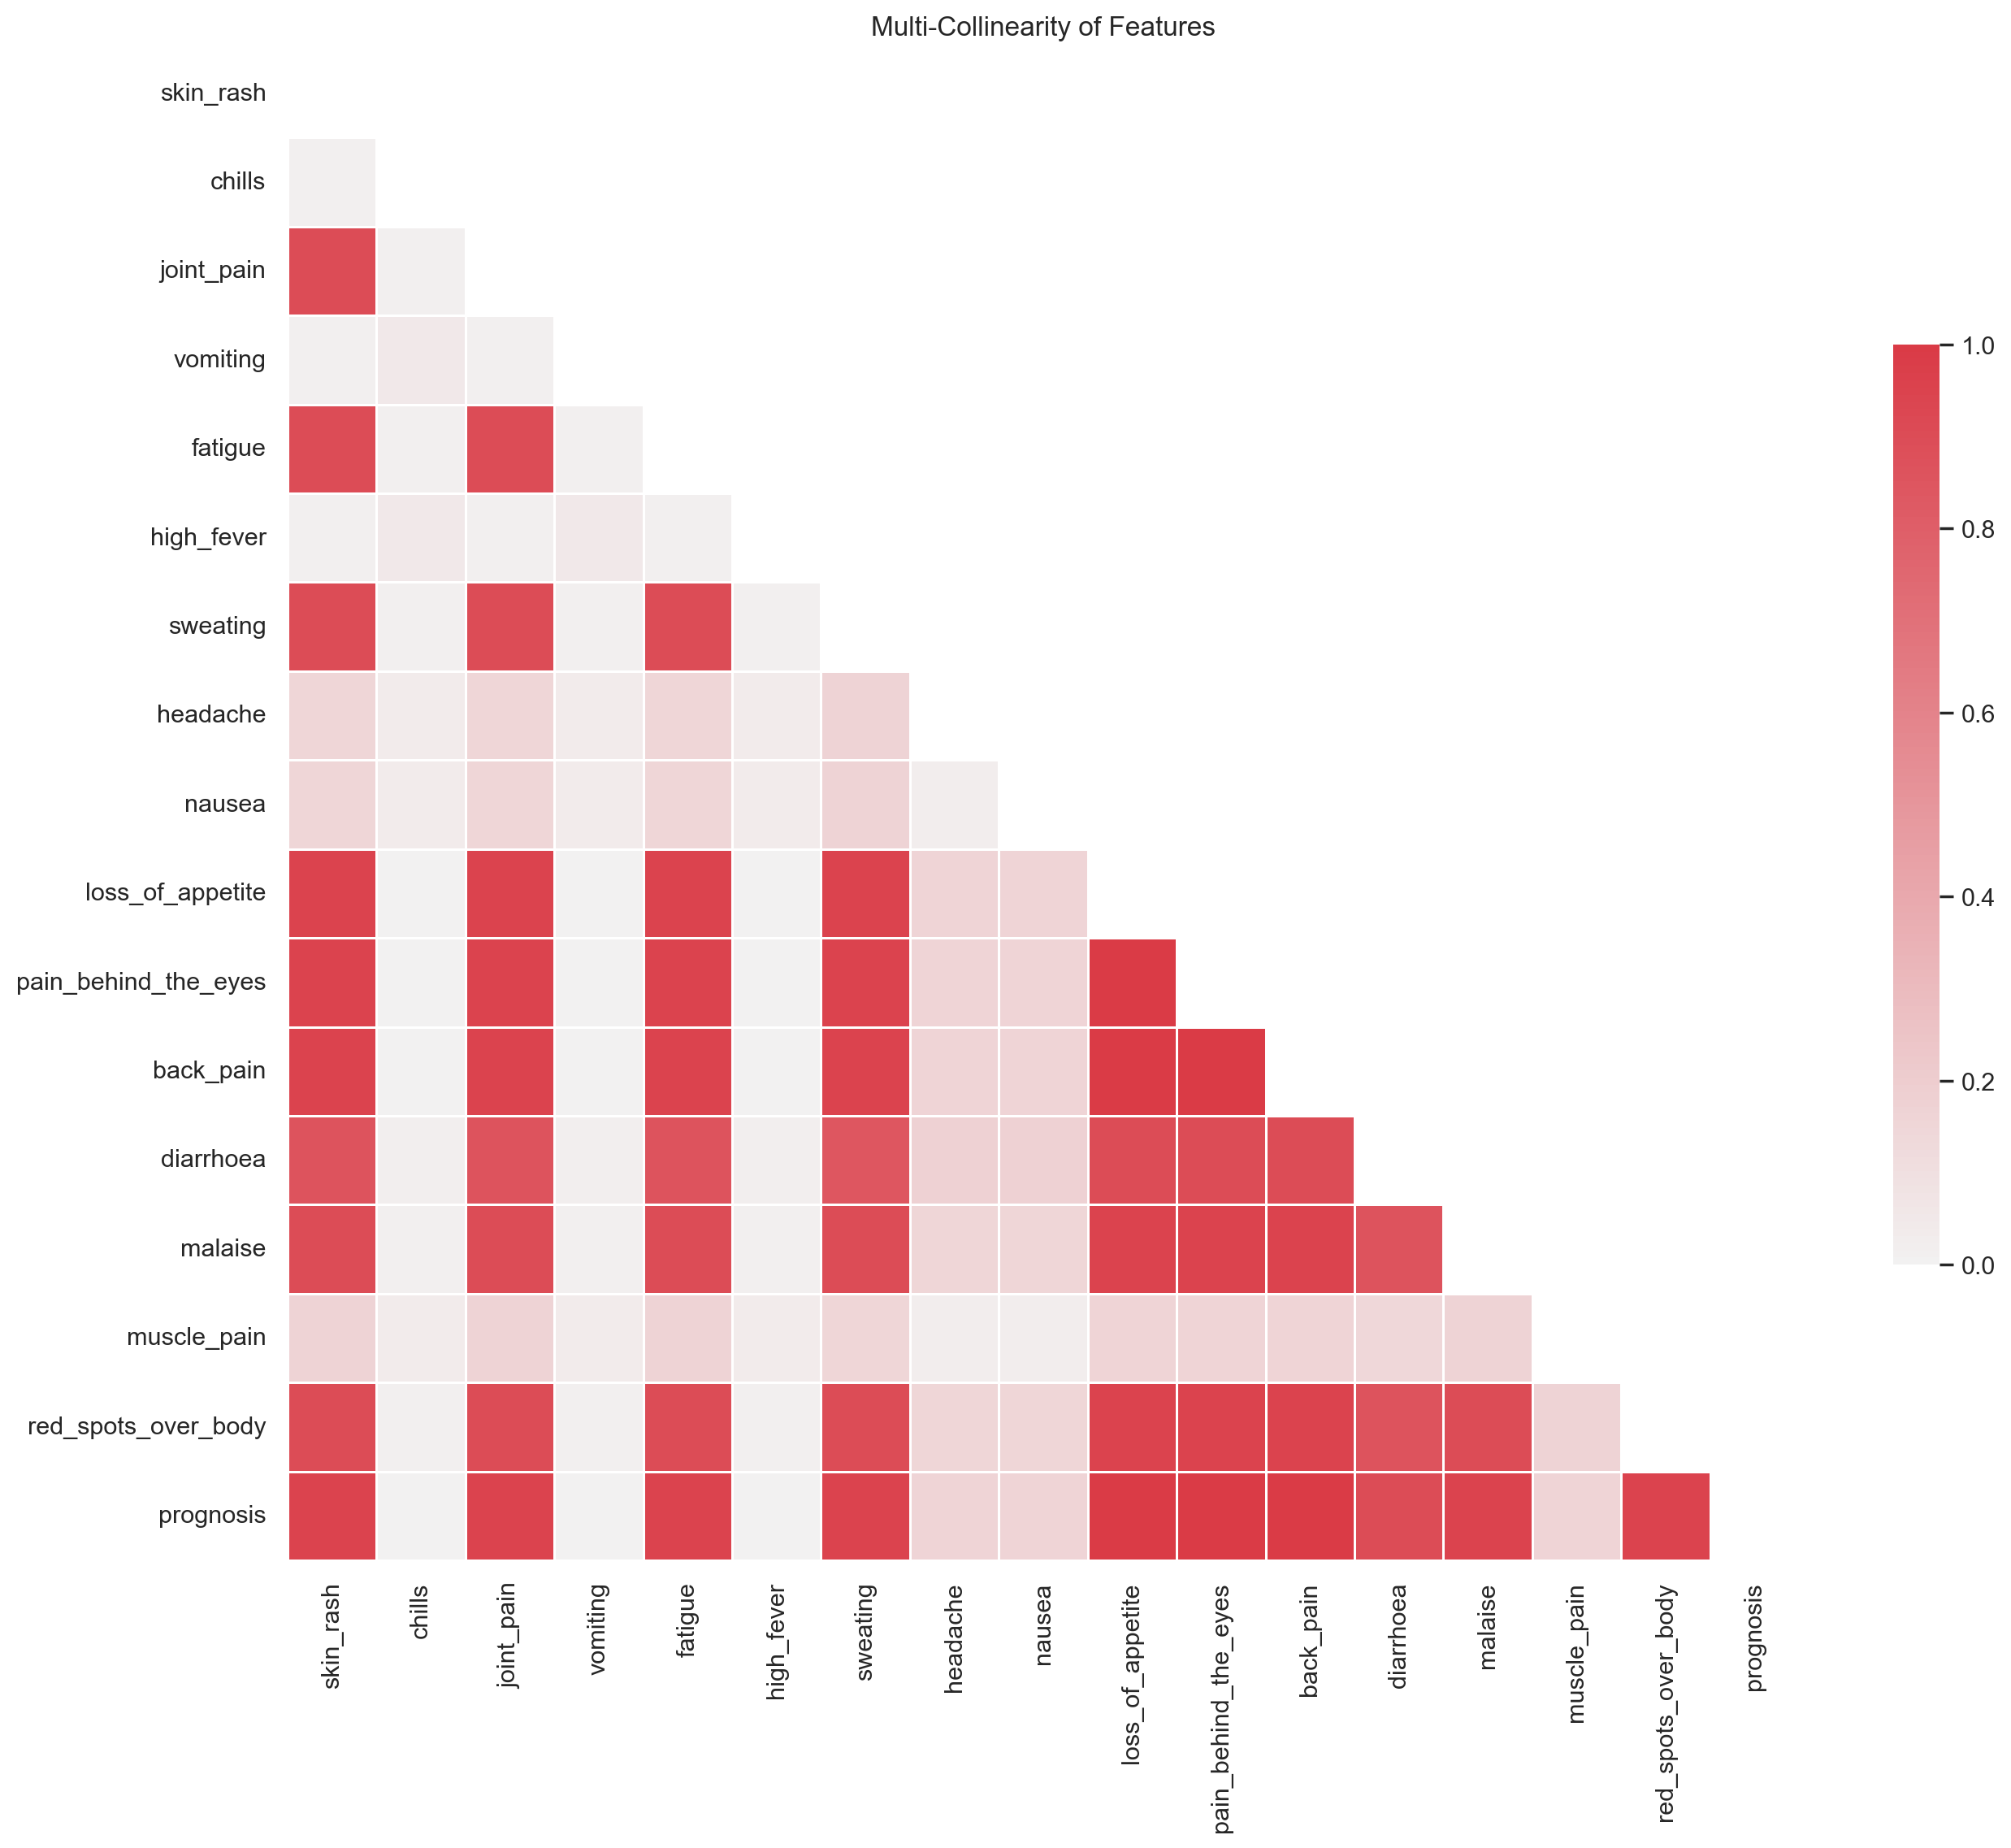

In [5]:
from pandas.plotting import scatter_matrix
import seaborn as sns

sns.set(style='white')

# Create covariance matrix
corr = data.corr().abs()
# creating a mask the size of the covariance matrix
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# set up the matplotlib figure
f, ax = plt.subplots(figsize=(15,15),dpi=200)
# generate a custom diverging colormap
cmap = sns.diverging_palette(200,10,as_cmap=True)
# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,mask=mask, cmap=cmap, vmax=1, center=0,square=True,linewidth=.5, cbar_kws={'shrink': .5})
ax.set_title('Multi-Collinearity of Features')

In [6]:
# display the matrix in a raw state
upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(bool))
print(upper_tri)

                      skin_rash    chills  joint_pain  vomiting   fatigue  \
skin_rash                   NaN  0.011485    0.899749  0.011485  0.899749   
chills                      NaN       NaN    0.011485  0.052632  0.011485   
joint_pain                  NaN       NaN         NaN  0.011485  0.899749   
vomiting                    NaN       NaN         NaN       NaN  0.011485   
fatigue                     NaN       NaN         NaN       NaN       NaN   
high_fever                  NaN       NaN         NaN       NaN       NaN   
sweating                    NaN       NaN         NaN       NaN       NaN   
headache                    NaN       NaN         NaN       NaN       NaN   
nausea                      NaN       NaN         NaN       NaN       NaN   
loss_of_appetite            NaN       NaN         NaN       NaN       NaN   
pain_behind_the_eyes        NaN       NaN         NaN       NaN       NaN   
back_pain                   NaN       NaN         NaN       NaN       NaN   

In [7]:
# prepare the highly correlated features in a list so we can drop them :
to_drop = [column for column in upper_tri.columns if any(upper_tri[column]>0.95)]
print(); print(to_drop)


['loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'malaise', 'red_spots_over_body', 'prognosis']


In [56]:
# dropping the highly correlated features


In [9]:
# check one last time for unique disease just incase 

# before = len(data['prognosis'].unique())
# after = len(train_tri['prognosis'].unique())
# print(f'unique diseases before : {before}')
# print(f'unique diseases after : {after}')

before = len(data['prognosis'].unique())
train_tri = data

In [11]:
# columns types to see if we need to convert anything
train_tri.dtypes

skin_rash               int64
chills                  int64
joint_pain              int64
vomiting                int64
fatigue                 int64
high_fever              int64
sweating                int64
headache                int64
nausea                  int64
loss_of_appetite        int64
pain_behind_the_eyes    int64
back_pain               int64
diarrhoea               int64
malaise                 int64
muscle_pain             int64
red_spots_over_body     int64
prognosis               int64
dtype: object

In [13]:
features = list(train_tri.columns[:-1]) # features
target = train_tri["prognosis"]

In [14]:
# Get dummy variable 
print(target)

0      1
1      1
2      1
3      1
4      1
      ..
235    0
236    0
237    0
238    0
239    0
Name: prognosis, Length: 240, dtype: int64


In [15]:
print(target[:3])

0    1
1    1
2    1
Name: prognosis, dtype: int64


In [18]:
train_tri.columns[:-1]

Index(['skin_rash', 'chills', 'joint_pain', 'vomiting', 'fatigue',
       'high_fever', 'sweating', 'headache', 'nausea', 'loss_of_appetite',
       'pain_behind_the_eyes', 'back_pain', 'diarrhoea', 'malaise',
       'muscle_pain', 'red_spots_over_body'],
      dtype='object')

In [19]:
#Split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(train_tri[features], train_tri[target], test_size=0.3, random_state=42)

KeyError: "None of [Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,\n            ...\n            0, 0, 0, 0, 0, 0, 0, 0, 0, 0],\n           dtype='int64', length=240)] are in the [columns]"

In [20]:
# Initialize variables
learning_rate = 0.1
iterations = 5000
N = y_train.size

# number of input features
input_size = 57

# number of hidden layers neurons
hidden_size = 2 

# number of neurons at the output layer
output_size = 2

results = pd.DataFrame(columns=["mse", "accuracy"])

NameError: name 'y_train' is not defined

In [49]:
# Initialize weights
np.random.seed(10)

# initializing weight for the hidden layer
W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))   

# initializing weight for the output layer
W2 = np.random.normal(scale=0.5, size=(hidden_size , output_size)) 

In [50]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)
    
def accuracy(y_pred, y_true):
    acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
    return acc.mean()

In [51]:
for itr in range(iterations):    
    
    # feedforward propagation
    # on hidden layer
    Z1 = np.dot(X_train, W1)
    A1 = sigmoid(Z1)

    # on output layer
    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)
    
    
    # Calculating error
    mse = mean_squared_error(A2, y_train)
    acc = accuracy(A2, y_train)
    results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
    
    # backpropagation
    E1 = A2 - y_train
    dW1 = E1 * A2 * (1 - A2)

    E2 = np.dot(dW1, W2.T)
    dW2 = E2 * A1 * (1 - A1)

    
    # weight updates
    W2_update = np.dot(A1.T, dW1) / N
    W1_update = np.dot(X_train.T, dW2) / N

    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update

ValueError: shapes (1008,46) and (57,2) not aligned: 46 (dim 1) != 57 (dim 0)

In [1]:
import tensorflow as tf

# Define the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10, input_shape=(num_features,), activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Dense(train_tri.columns[:-1], activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Test the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

ModuleNotFoundError: No module named 'tensorflow'